# Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, os.environ.get('SRC_FIGMA_PATH'))

from cryptocurrencyetl import CryptocurrencyEtl
import resources.context as c
from resources.dataanalysis import DataAnalysis

# 1.0. Data Extraction

In [11]:
# extract any cryptocurrency historical data to analysis
crypto = 'ETH'
market_curr = 'USD'
api_key = os.environ.get('TOKEN_FIGMA_CRYPTO_KEY')

crypt_etl = CryptocurrencyEtl(crypto=crypto, market_curr=market_curr, api_key=api_key)

#crypt_etl.test_market_curr()
#crypt_etl.test_crypto()

df_btc_usd = crypt_etl.run()

2022-06-17 21:18:18,285 (INFO)	||| Initing extract of ETL to obtain ETH historical data in USD value!
2022-06-17 21:18:20,569 (INFO)	||| Initing data transform of ETH historical data!
2022-06-17 21:18:20,581 (INFO)	||| ETL finished!


In [12]:
# use standard dataset to test notebook's code
#df_btc_usd = pd.read_csv(c.DATA_PROC_FLD / 'btc_usd_proc.csv')

# 2.0. Data Analysis

In [13]:
analy = DataAnalysis(df_btc_usd, date_col='timestamp', individual_figsize=(18, 8))

## 2.1. Statistical Description

In [14]:
analy.statistical_description()

,attributes,mean,median,std,min,max,range,skew,kurtosis
0,open,1593.356830,1375.405000,1404.473895,107.6700,4.807980e+03,4.700310e+03,0.472876,-1.178141
1,high,1648.355430,1422.415000,1448.294705,118.5000,4.868000e+03,4.749500e+03,0.457512,-1.205242
2,low,1528.434840,1275.555000,1351.695698,86.0000,4.713890e+03,4.627890e+03,0.490485,-1.150580
3,close,1594.216040,1375.580000,1403.916513,107.8200,4.807980e+03,4.700160e+03,0.472549,-1.177199
4,volume,777578.020824,636457.458185,548271.227574,45780.7873,4.663240e+06,4.617459e+06,2.484177,9.654369


## 2.2. Temporal Estability

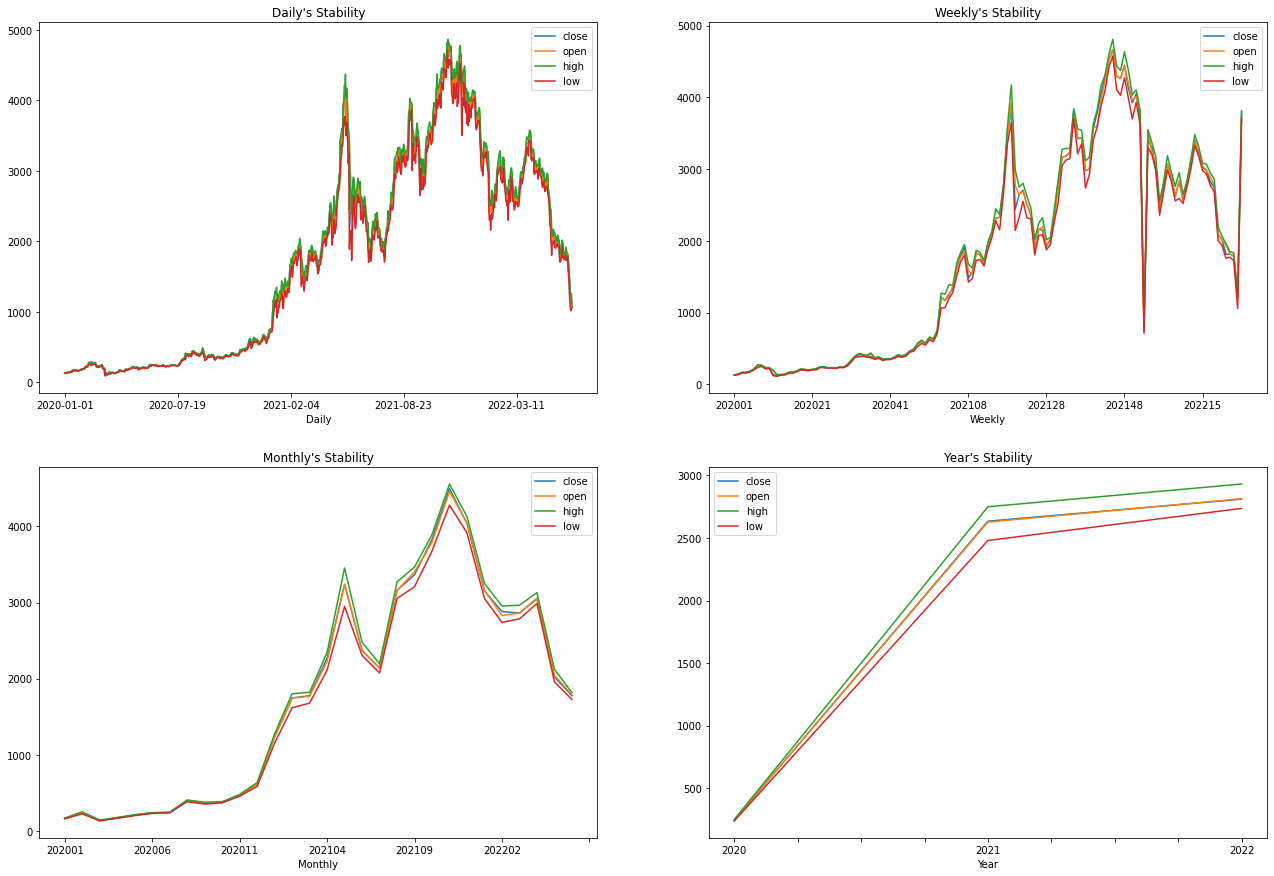

In [19]:
analy.all_timely_stability(y=['close', 'open', 'high', 'low'])

## 2.3. Outlier Identification

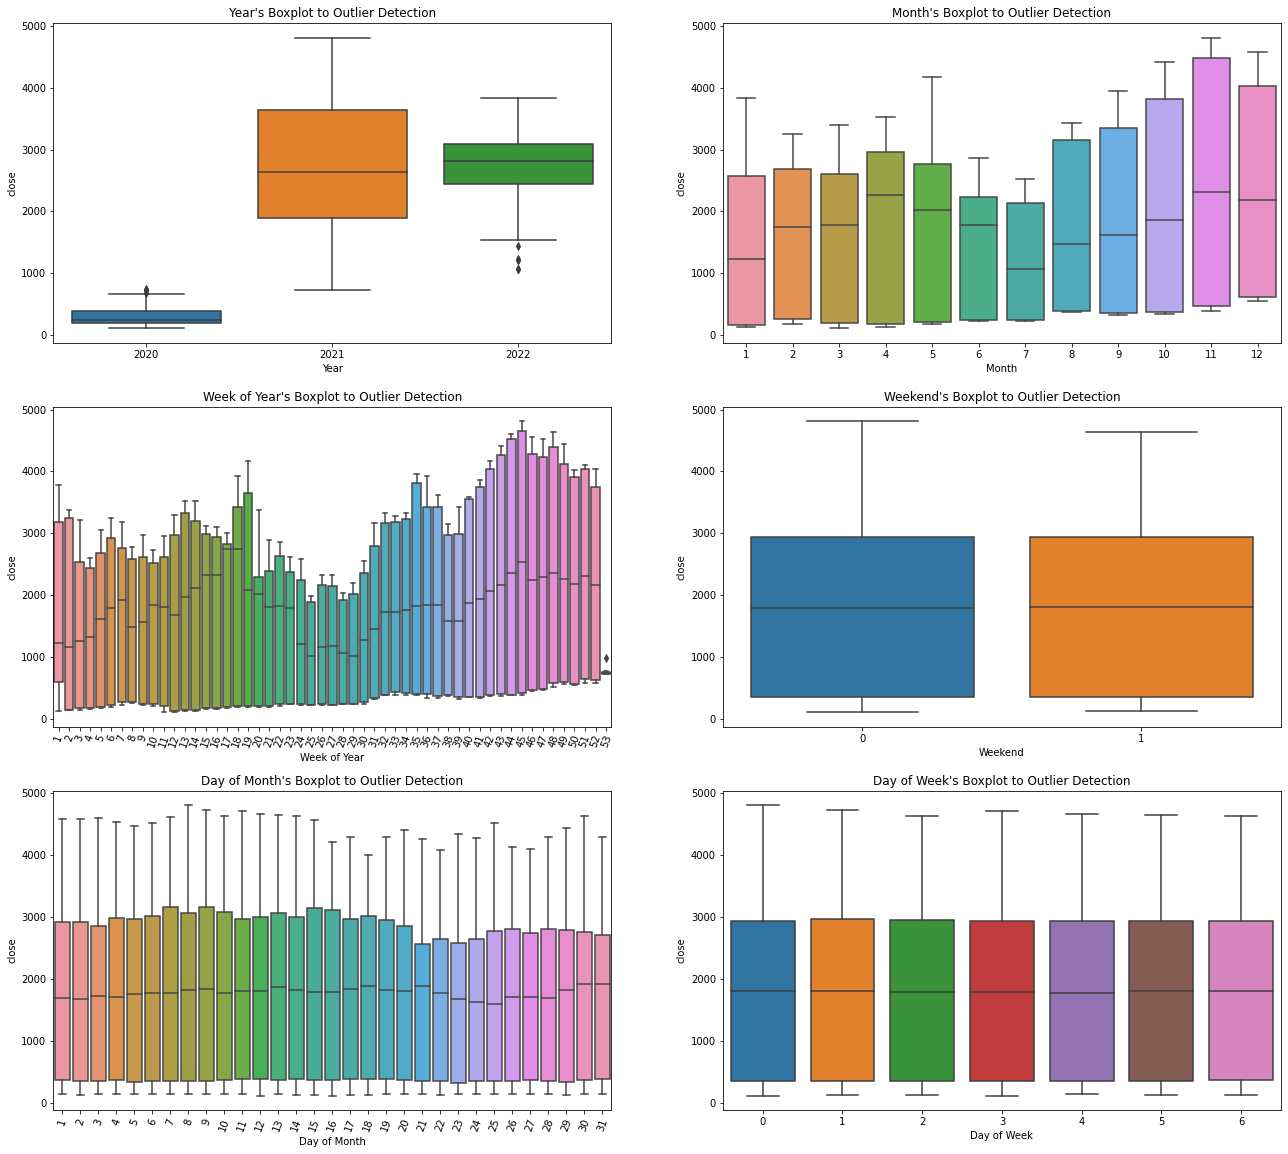

In [16]:
analy.all_temporal_outlier_detector_boxplots(y='close')

## 2.4. Distribution

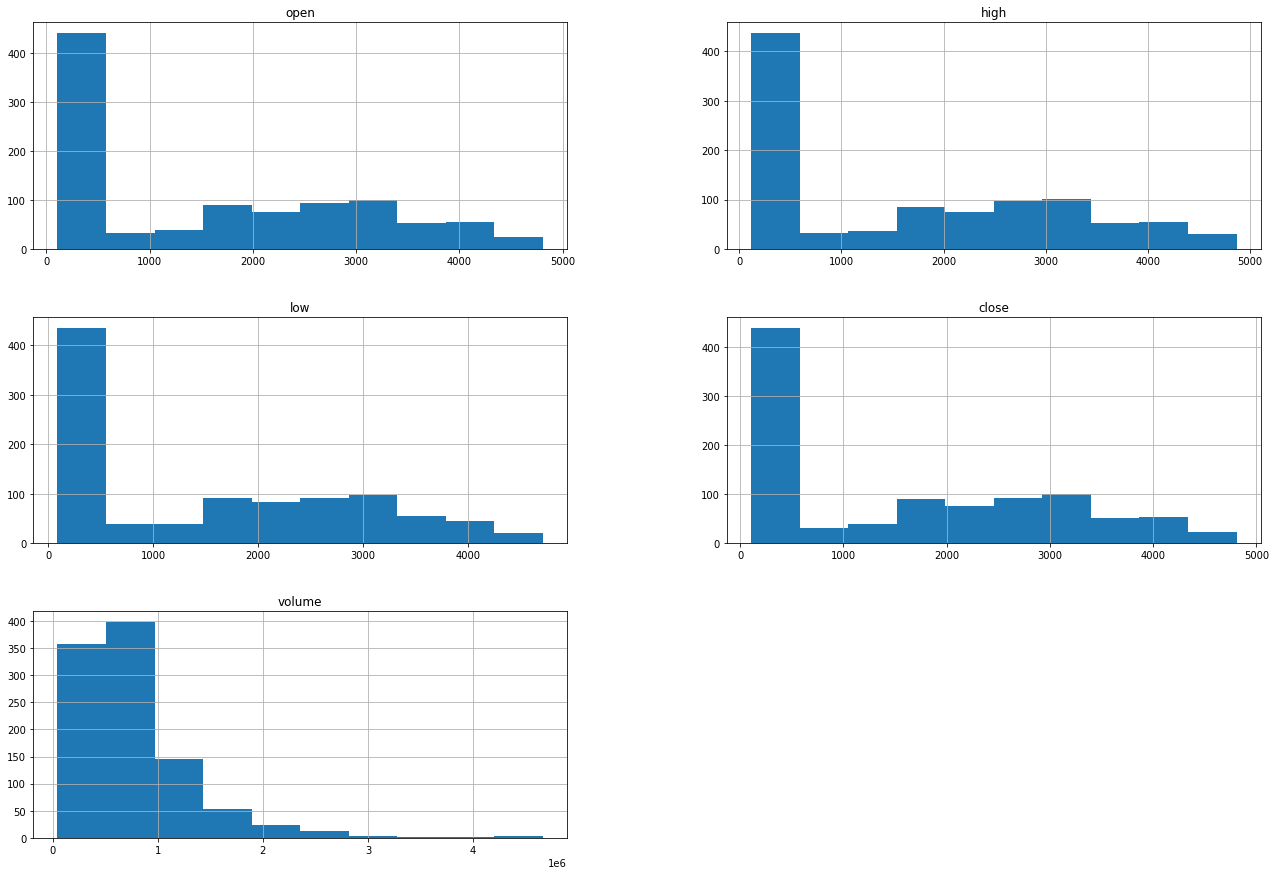

In [17]:
analy.distribution_check()

## 2.5. Nature Transformation Effect

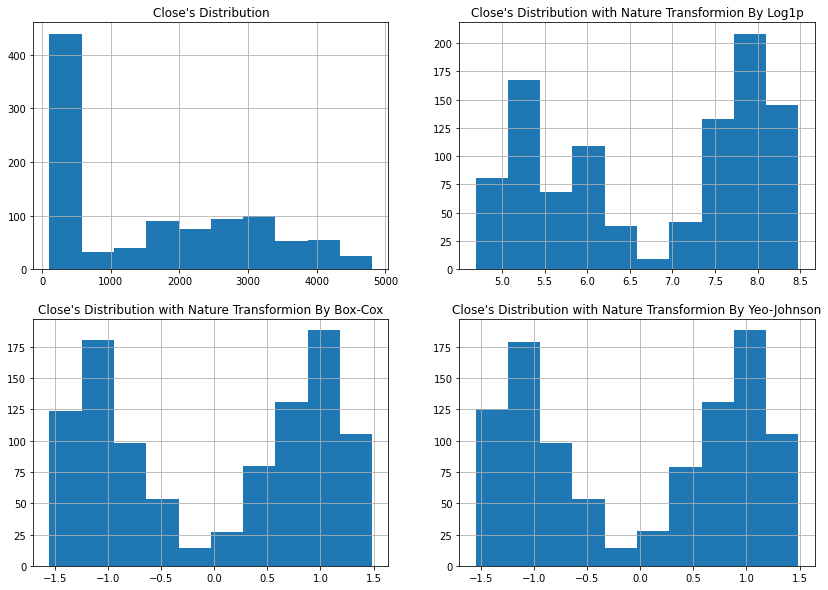

In [18]:
analy.nature_transform_effect_check(y='close', all_figsize=(14, 10))

# 3.0. Data Preparation

## 3.1. Adjust Dataset

## 3.2. Nature Transformation

# 4.0. Machine Learning Model

## 4.1. SARIMAX

### 4.1.1. Modeling

### 4.1.2. Validation

## 4.2. ARIMA

### 4.2.1. Modeling

### 4.2.2. Validation

## 4.3. Saving Model